In [ ]:
#https://inspiringpeople.github.io/data%20analysis/Ensemble_Keras/

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


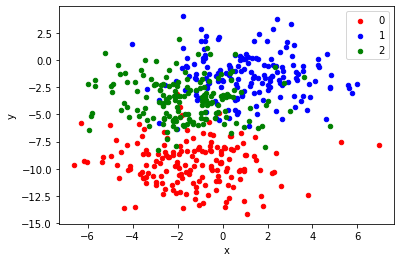

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Train: 0.860, Test: 0.771


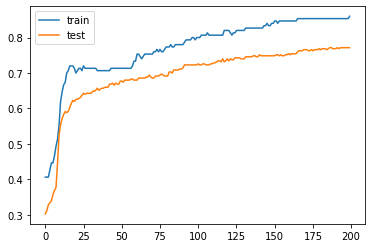

In [ ]:
# fit high variance mlp on blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(15, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
#print(history)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

> 0.797
> 0.766
> 0.766
> 0.743
> 0.757
> 0.760
> 0.769
> 0.757
> 0.763
> 0.729
> 0.763
> 0.789
> 0.766
> 0.731
> 0.757
> 0.760
> 0.723
> 0.797
> 0.774
> 0.766
> 0.766
> 0.757
> 0.766
> 0.766
> 0.783
> 0.777
> 0.783
> 0.766
> 0.763
> 0.757
Scores Mean: 0.764, Standard Deviation: 0.017


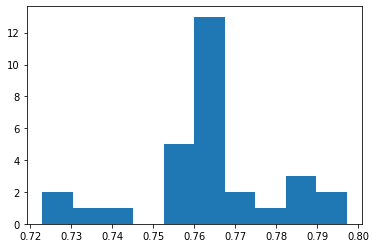

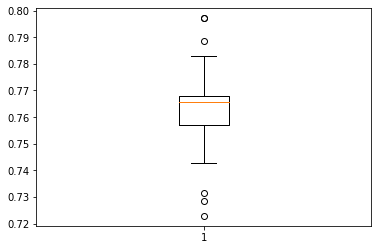

In [ ]:
# demonstrate high variance of mlp model on blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot

# fit and evaluate a neural net model on the dataset
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=200, verbose=0)
	# evaluate the model
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return test_acc

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# repeated evaluation
n_repeats = 30
scores = list()
for _ in range(n_repeats):
	score = evaluate_model(trainX, trainy, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))
# histogram of distribution
pyplot.hist(scores, bins=10)
pyplot.show()
# boxplot of distribution
pyplot.boxplot(scores)
pyplot.show()

1
> 0.769
2
> 0.769
3
> 0.774
4
> 0.757
5
> 0.766
6
> 0.766
7
> 0.760
8
> 0.760
9
> 0.754
10
> 0.757
11
> 0.757
12
> 0.760
13
> 0.757
14
> 0.760
15
> 0.763
16
> 0.763
17
> 0.763
18
> 0.766
19
> 0.766
20
> 0.766


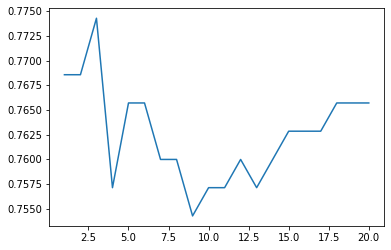

In [ ]:
# model averaging ensemble and a study of ensemble size on test accuracy
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model on dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=200, verbose=0)
	return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	print(len(subset))
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
# fit all models
n_members = 20
members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate different numbers of ensembles
scores = list()
for i in range(1, n_members+1):
	score = evaluate_n_members(members, i, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
# plot score vs number of ensemble members
x_axis = [i for i in range(1, n_members+1)]
pyplot.plot(x_axis, scores)
pyplot.show()

In [ ]:
# repeated evaluation of model averaging ensemble on blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# fit model on dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=200, verbose=0)
	return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result

# evaluate ensemble model
def evaluate_members(members, testX, testy):
	# make prediction
	yhat = ensemble_predictions(members, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
# repeated evaluation
n_repeats = 30
n_members = 5
scores = list()
for _ in range(n_repeats):
	# fit all models
	members = [fit_model(trainX, trainy) for _ in range(n_members)]
	# evaluate ensemble
	score = evaluate_members(members, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

> 0.766
> 0.769
> 0.766
> 0.769
> 0.763
> 0.766
> 0.774
> 0.786
> 0.766
> 0.774
> 0.780
> 0.769
> 0.771
> 0.774
> 0.760
> 0.769
> 0.769
> 0.757
> 0.769
> 0.769
> 0.766
> 0.771
> 0.771
> 0.766
> 0.749
> 0.774
> 0.774
> 0.786
> 0.771
> 0.754
Scores Mean: 0.769, Standard Deviation: 0.008
